# Pablo Escobar
## 20936
## Laboratorio 3


### Task 1.1: Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para ser trabajado en el notebook.

In [39]:
import numpy as np
csvValues = np.genfromtxt('data.csv', delimiter=',')
csvValues = np.array(csvValues)
csvValues[:,2] 
csvValues = csvValues[~np.isnan(csvValues[:,2])]
csvValues[:,2] 
csvValues[:,5] 
csvValues = csvValues[~np.isnan(csvValues[:,5])]
csvValues[:,5] 


array([1180., 2570.,  770., ..., 1020., 1600., 1020.])

# Task 1.2: Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

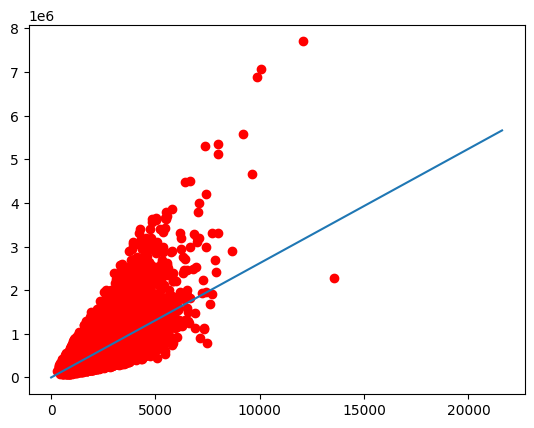

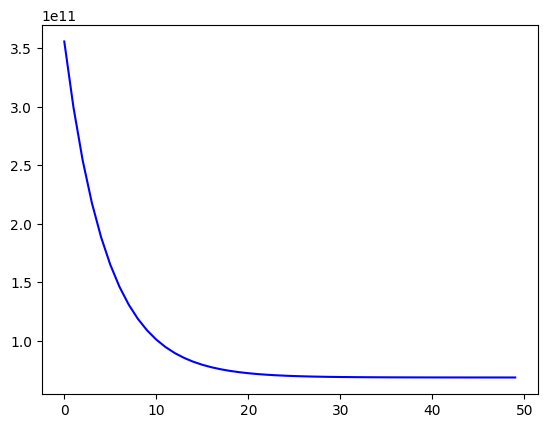

In [40]:
import matplotlib.pyplot as plt
import numpy as np

from utils import *

X = csvValues[:,5]
y = csvValues[:,2]
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

Xr = np.hstack((np.ones_like(X), X))
to = np.random.rand(Xr.shape[1], 1) 
to = to[~np.isnan(to)]
to = to.reshape((len(to), 1))

tf, costs = linear_regression( Xr, y, to, cost, grad, a=0.00000001, n=50 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
ym = xmr @ tf

plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

plt.plot(costs, color="blue")
plt.show()

# Task 1.3: Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).

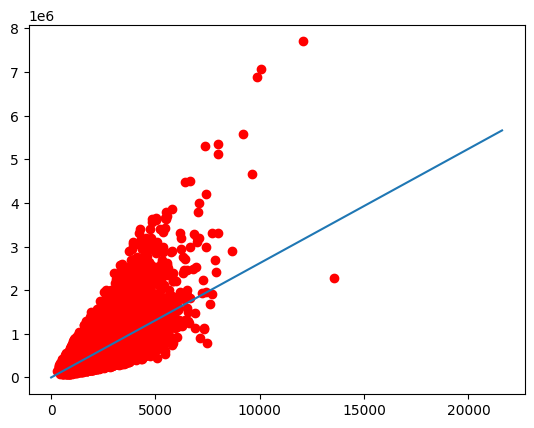

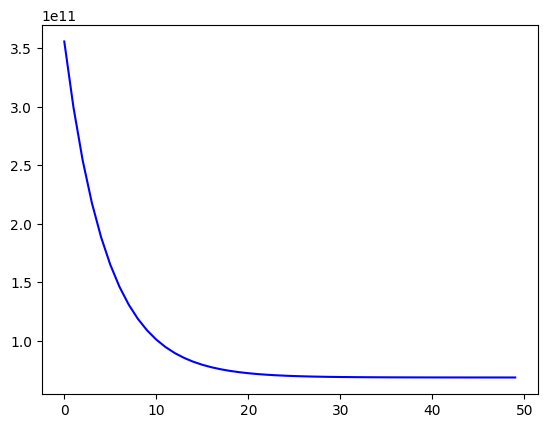

In [41]:
import matplotlib.pyplot as plt
import numpy as np

from utils import *

X = csvValues[:,5]
y = csvValues[:,2]

X = X[~np.isnan(X)]
y = y[~np.isnan(y)]
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))
Xr = np.hstack((np.ones_like(X), X))
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.
to = to[~np.isnan(to)]
to = to.reshape((len(to), 1))

tf, costs = linear_regression( Xr, y, to, cost, grad, a=0.00000001, n=50 )

xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
ym = xmr @ tf # Pendiente de la recta a utilizar.

plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

plt.plot(costs, color="blue")
plt.show()

# Task 1.4: Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

# Polinomio de grado 1.

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[4.97910780e-01]
 [1.71072775e+04]]
xmr:  [[1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 2.1613e+04 2.1613e+04]]
xm:  [[    0]
 [21613]]
tf:  [[0.49791078]
 [0.57300692]
 [0.21849725]]


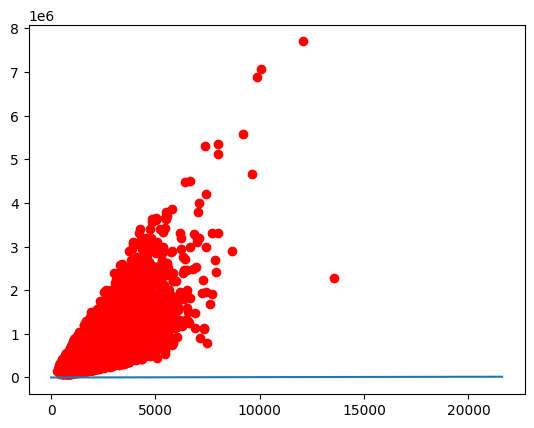

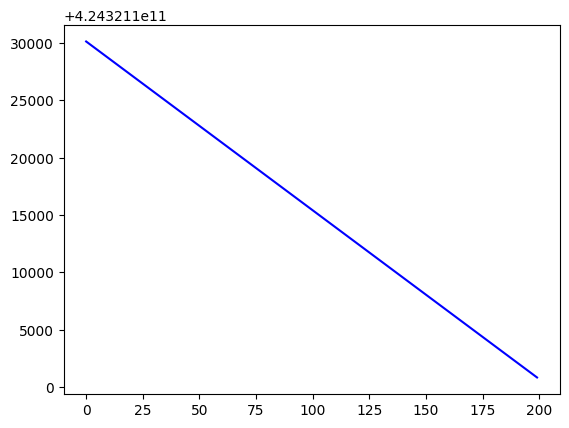

In [42]:
import matplotlib.pyplot as plt
import numpy as np

from utils import *

X = csvValues[:,5]
y = csvValues[:,2]

X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)

Xr = np.hstack((np.ones_like(X), X))


Xr = np.hstack(( Xr, Xr[:,1].reshape((Xr.shape[0], 1)) ** 1 ))

to = np.random.rand(Xr.shape[1], 1) # Theta inicial.
to = to[~np.isnan(to)]
to = to.reshape((len(to), 1))
tf, costs = linear_regression( Xr, y, to, cost, grad, a=0.00000000000000001, n=200 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 1 ))
ym = xmr @ tf # Pendiente de la recta a utilizar.

print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

plt.plot(costs, color="blue")
plt.show()

# Polinomio de grado 2

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[5.03837328e-01]
 [3.53472720e+07]]
xmr:  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.16130000e+04 4.67121769e+08]]
xm:  [[    0]
 [21613]]
tf:  [[0.50383733]
 [0.13284549]
 [0.07566421]]


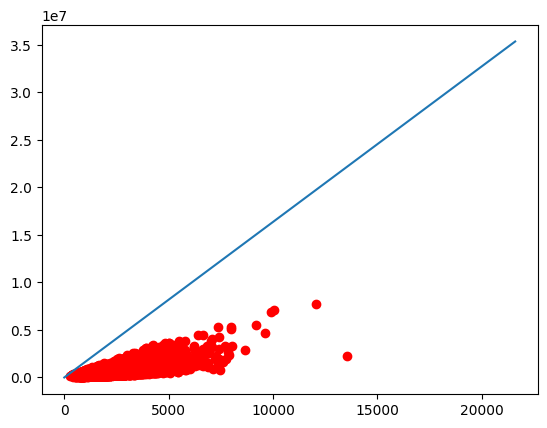

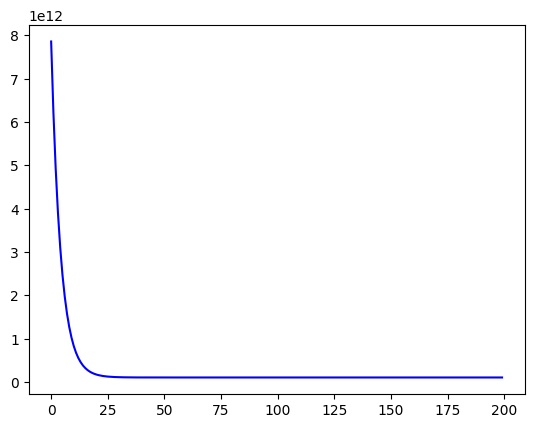

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from utils import *

X = csvValues[:,5]
y = csvValues[:,2]

X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)

Xr = np.hstack((np.ones_like(X), X))

Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 2 ))

to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

to = to.reshape((len(to), 1))
tf, costs = linear_regression( Xr, y, to, cost, grad, a=0.000000000000001, n=200 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 2 ))
ym = xmr @ tf # Pendiente de la recta a utilizar.
print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="blue")
plt.show()

# Polinomio de grado 3

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[2.07736346e+69]
 [2.10819656e+93]]
xmr:  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.16130000e+04 1.00959028e+13]]
xm:  [[    0]
 [21613]]
tf:  [[2.07736346e+69]
 [7.54766715e+72]
 [2.08817042e+80]]


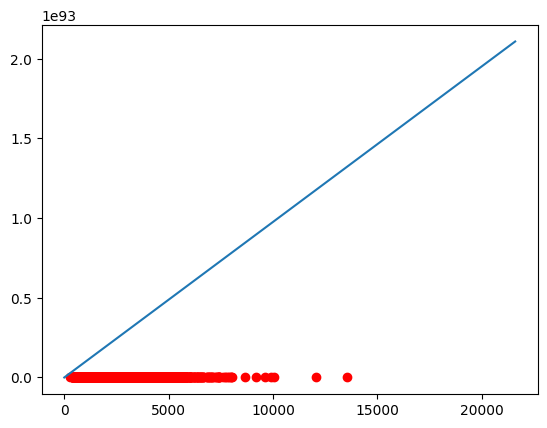

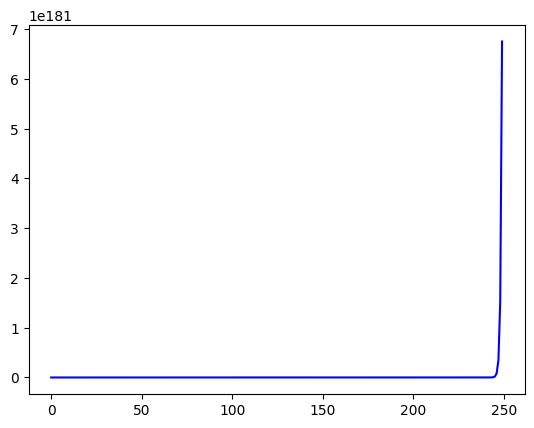

In [44]:
import matplotlib.pyplot as plt
import numpy as np

from utils import *

X = csvValues[:,5]

y = csvValues[:,2]

X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)


Xr = np.hstack((np.ones_like(X), X))


Xr = np.hstack((
    Xr, 
    Xr[:,1].reshape((Xr.shape[0], 1)) ** 3
))


to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

to = to.reshape((len(to), 1))

tf, costs = linear_regression( Xr, y, to, cost, grad, a=0.000000000000000000001, n=250 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 3 ))

ym = xmr @ tf # Pendiente de la recta a utilizar.


print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

plt.plot(costs, color="blue")
plt.show()

# Polinomio de grado 4

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[8.76113172e-01]
 [1.54866986e+08]]
xmr:  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.16130000e+04 2.18202747e+17]]
xm:  [[    0]
 [21613]]
tf:  [[8.76113172e-01]
 [9.63640621e-01]
 [7.09643487e-10]]


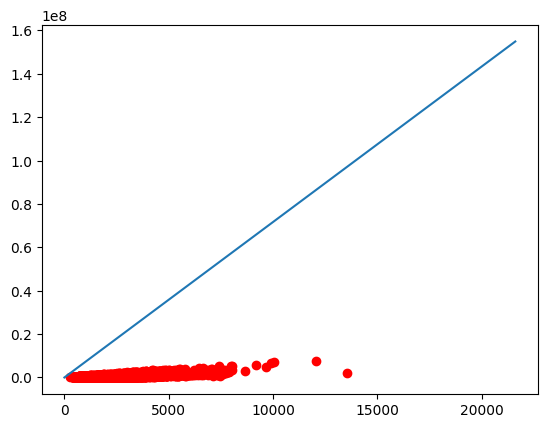

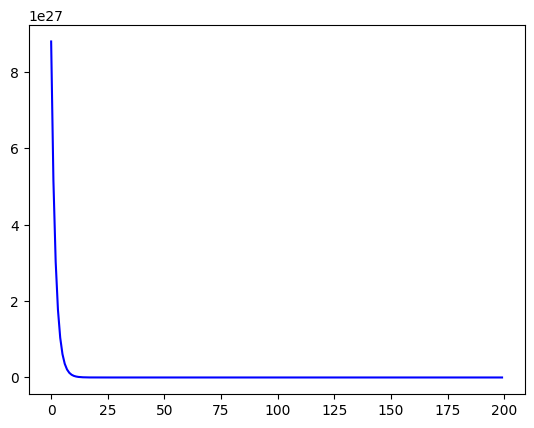

In [45]:
import matplotlib.pyplot as plt
import numpy as np

from utils import *

X = csvValues[:,5]
y = csvValues[:,2]

X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)

Xr = np.hstack((np.ones_like(X), X))

Xr = np.hstack((
    Xr, 
    Xr[:,1].reshape((Xr.shape[0], 1)) ** 4
))

to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

to = to.reshape((len(to), 1))

tf, costs = linear_regression( Xr, y, to, cost, grad, a=0.000000000000000000000000000001, n=200 )

xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 4 ))
ym = xmr @ tf # Pendiente de la recta a utilizar.


print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="blue")
plt.show()

# Polinomio de grado 5

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[6.70790424e-01]
 [1.67356316e+08]]
xmr:  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.16130000e+04 4.71601597e+21]]
xm:  [[    0]
 [21613]]
tf:  [[6.70790424e-01]
 [5.97605173e-01]
 [3.54840612e-14]]


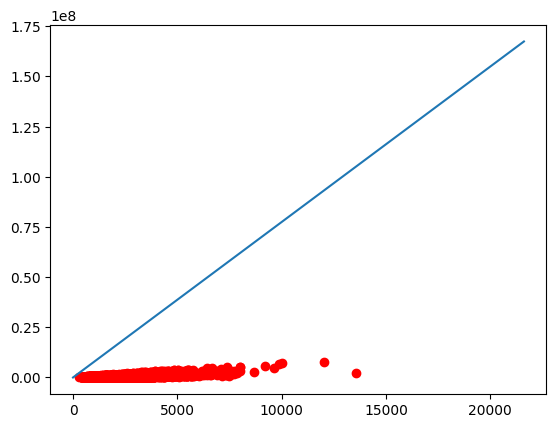

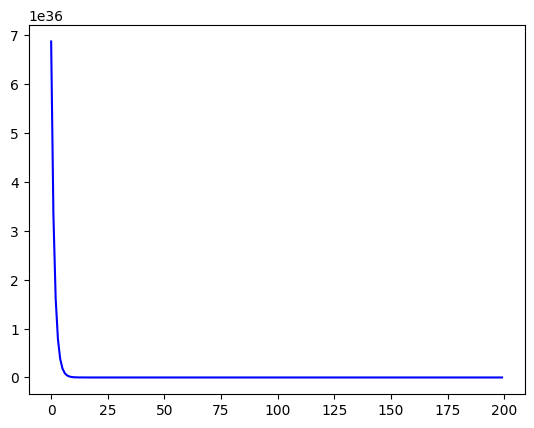

In [46]:
# Haciendo imports.
import matplotlib.pyplot as plt
import numpy as np
from utils import *

X = csvValues[:,5]
y = csvValues[:,2]

X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)

Xr = np.hstack((np.ones_like(X), X))
Xr = np.hstack(( Xr, Xr[:,1].reshape((Xr.shape[0], 1)) ** 5 ))

to = np.random.rand(Xr.shape[1], 1) # Theta inicial.
to = to[~np.isnan(to)]
to = to.reshape((len(to), 1))

tf, costs = linear_regression( Xr, y, to, cost, grad, a=0.00000000000000000000000000000000000001, n=200 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack(( np.ones((2, 1)), xm ))
xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 5 ))
ym = xmr @ tf # Pendiente de la recta a utilizar.

print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="blue")
plt.show()

# Polinomio de grado 6

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
ym:  [[5.75453896e-01]
 [1.86519465e+08]]
xmr:  [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.16130000e+04 1.01927253e+26]]
xm:  [[    0]
 [21613]]
tf:  [[5.75453896e-01]
 [7.70714207e-02]
 [1.82991097e-18]]


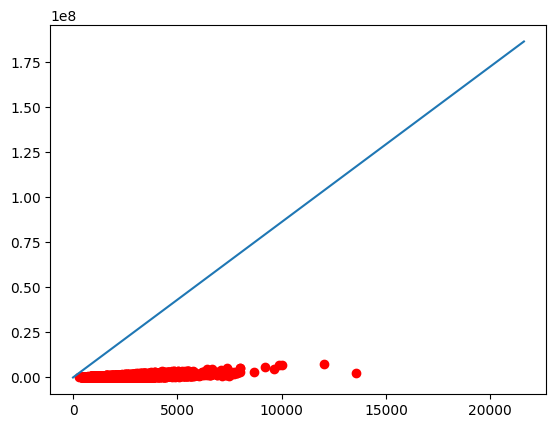

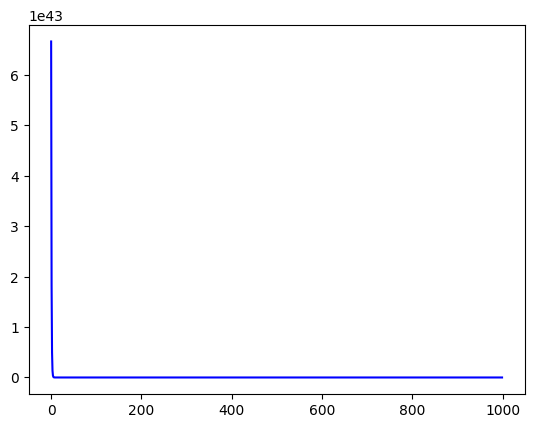

In [47]:
# Haciendo imports.
import matplotlib.pyplot as plt
import numpy as np

from utils import *

X = csvValues[:,5]

y = csvValues[:,2]

X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("Precios: ", X)
print("Sqft_living", y)

Xr = np.hstack((np.ones_like(X), X))

Xr = np.hstack(( Xr, Xr[:, 1].reshape((Xr.shape[0], 1)) ** 6 ))
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.
to = to[~np.isnan(to)]

to = to.reshape((len(to), 1))

tf, costs = linear_regression( Xr, y, to, cost, grad, a=0.0000000000000000000000000000000000000000000001, n=1000 )
xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))


xmr = np.hstack(( xmr, xmr[:, 1].reshape((xmr.shape[0], 1)) ** 6 ))

ym = xmr @ tf 


print("ym: ", ym)
print("xmr: ", xmr)
print("xm: ", xm)
print("tf: ", tf)

plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()
plt.plot(costs, color="blue")
plt.show()

# Inciso 5: Haga un análisis sobre sus hallazgos.

#### Durante el desarrollo del laboratorio se pudo constatar que la mayoría de las casas en el conjunto de datos tenían precios comprendidos entre los $200,000 y los $400,000. Esto indica que los precios de las casas en King Country, Seattle no son tan elevados en comparación con otras ciudades como Nueva York o Washington. Por otro lado, se pudo comprobar que el algoritmo que se empleó para hallar la regresión lineal del modelo fue bastante preciso y ajustado a los datos. Finalmente, es de gran relevancia mencionar que el polinomio que mejor describe la distribución de los puntos es aquel que tiene grado 2. Lo anterior implica que una parábola podría ser útil para analizar de una mejor manera el conjunto de datos presentado para el laboratorio.